In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [2]:
dataset = pd.read_csv("weatherHistory.csv") # leyendo dataset

In [3]:
dataset.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
dataset.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [5]:
dataset["Precip Type"].isnull().values.any()  # unica columna con valores nulos

True

In [6]:
dataset.groupby("Precip Type").count()  # tipos de precipitaciones

,Formatted Date,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Precip Type,,,,,,,,,,,
rain,85224,85224,85224,85224,85224,85224,85224,85224,85224,85224,85224
snow,10712,10712,10712,10712,10712,10712,10712,10712,10712,10712,10712


In [7]:
dataset[dataset["Precip Type"].isnull()]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
52672,2012-04-11 16:00:00.000 +0200,Mostly Cloudy,NaN,19.016667,19.016667,0.26,14.8764,163.0,9.9820,0.0,1002.40,Mostly cloudy until night.
52674,2012-04-11 18:00:00.000 +0200,Mostly Cloudy,NaN,17.850000,17.850000,0.28,13.7977,169.0,9.9820,0.0,1001.79,Mostly cloudy until night.
52675,2012-04-11 19:00:00.000 +0200,Mostly Cloudy,NaN,16.322222,16.322222,0.32,10.8192,151.0,9.9820,0.0,1001.60,Mostly cloudy until night.
52677,2012-04-11 21:00:00.000 +0200,Mostly Cloudy,NaN,12.566667,12.566667,0.43,9.0160,159.0,9.9820,0.0,1001.92,Mostly cloudy until night.
52678,2012-04-11 22:00:00.000 +0200,Mostly Cloudy,NaN,12.927778,12.927778,0.47,17.6295,197.0,16.1000,0.0,1002.20,Mostly cloudy until night.
52680,2012-04-12 00:00:00.000 +0200,Mostly Cloudy,NaN,10.100000,10.100000,0.61,11.3666,180.0,16.1000,0.0,1002.25,Light rain in the morning.
52681,2012-04-12 01:00:00.000 +0200,Partly Cloudy,NaN,10.183333,10.183333,0.64,7.2128,150.0,16.1000,0.0,1002.05,Light rain in the morning.
52683,2012-04-12 03:00:00.000 +0200,Mostly Cloudy,NaN,10.700000,10.700000,0.70,14.6993,133.0,16.1000,0.0,1001.42,Light rain in the morning.
52684,2012-04-12 04:00:00.000 +0200,Partly Cloudy,NaN,9.744444,8.022222,0.73,11.9623,142.0,16.1000,0.0,1001.11,Light rain in the morning.
52687,2012-04-12 07:00:00.000 +0200,Mostly Cloudy,NaN,10.055556,10.055556,0.76,13.9748,213.0,11.1090,0.0,1001.22,Light rain in the morning.


In [43]:
dataset['Precip Type'] = dataset['Precip Type'].fillna(value='No Precip')

In [44]:
dataset[dataset["Precip Type"].isnull()]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary


In [8]:
dataset["Formatted Date"] = pd.to_datetime(dataset["Formatted Date"])

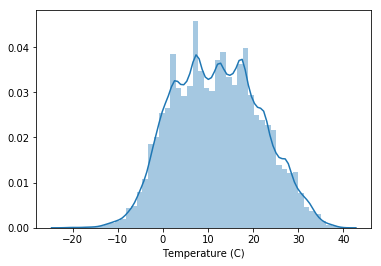

In [57]:
sns.distplot(dataset['Temperature (C)'])

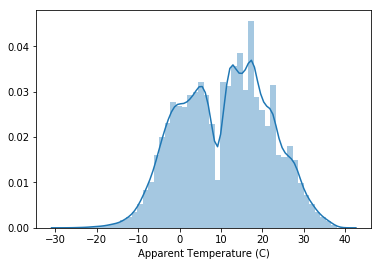

In [58]:
sns.distplot(dataset['Apparent Temperature (C)'])

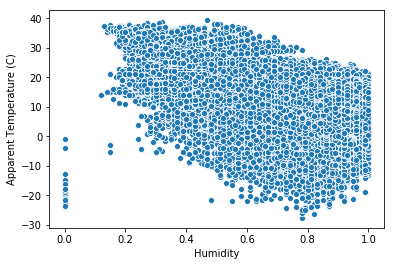

In [10]:
sns.scatterplot(x="Humidity", y="Apparent Temperature (C)", data=dataset)

In [11]:
dataset["Humidity"].corr(dataset["Temperature (C)"])

-0.6322546750278031

In [12]:
dataset["Humidity"].corr(dataset["Apparent Temperature (C)"])

-0.6025709955733908

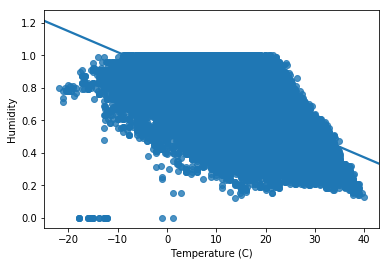

In [59]:
sns.regplot(x="Temperature (C)", y="Humidity", data=dataset)

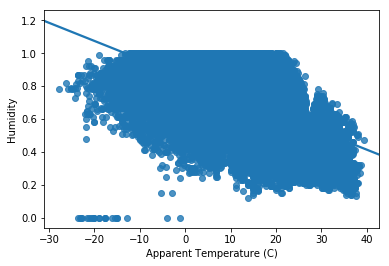

In [67]:
sns.regplot(x="Apparent Temperature (C)", y="Humidity", data=dataset)

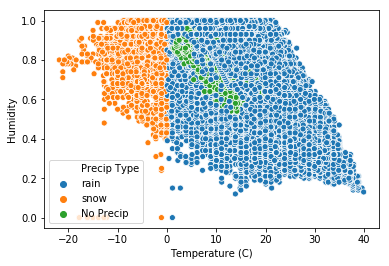

In [65]:
sns.scatterplot(x="Temperature (C)", y="Humidity", hue="Precip Type", data=dataset)

In [13]:
x_train = dataset["Temperature (C)"][:77162]
X = x_train.as_matrix()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [14]:
X =X.reshape(-1,1)

In [15]:
x_test = dataset["Temperature (C)"][77163:]

In [16]:
X_test = x_test.as_matrix()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [17]:
X_test = X_test.reshape(-1,1)
X_test

array([[ 0.35555556],
       [ 1.13888889],
       [ 2.22222222],
       ...,
       [22.03888889],
       [21.52222222],
       [20.43888889]])

In [18]:
y_train = dataset["Humidity"][:77162]

In [19]:
y_test = dataset["Humidity"][77163:]

In [20]:
regr = linear_model.LinearRegression()

In [21]:
regr.fit(X, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
y_pred = regr.predict(X_test)

Coefficients: 
 [-0.01289792]
Intercept: 
 0.8832034246205904
Mean squared error: 0.02
Variance score: 0.37


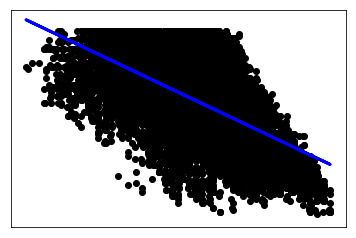

In [23]:
# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X=X_test, y=y_test))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### Regresion con Temperature y Apparent Temperature 

In [24]:
X = dataset[["Temperature (C)", "Apparent Temperature (C)"]][:77162]
Y = dataset["Humidity"][:77162]

In [31]:
X_test = dataset[["Temperature (C)", "Apparent Temperature (C)"]][77163:]
Y_test = dataset["Humidity"][77163:]

In [32]:
regr2 = linear_model.LinearRegression()
regr2.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
print('Intercept: \n', regr2.intercept_)
print('Coefficients: \n', regr2.coef_)
print('Variance score: %.2f' % regr2.score(X=X_test, y=Y_test))

Intercept: 
 0.9560774038625242
Coefficients: 
 [-0.04646432  0.03021025]
Variance score: 0.42


### Usando One-hot encoding

In [45]:
one_hot = pd.get_dummies(dataset['Precip Type'])

In [49]:
df = dataset.join(one_hot)

In [50]:
X = df[["Temperature (C)", "Apparent Temperature (C)", "No Precip", "rain", "snow"]][:77162]
Y = df["Humidity"][:77162]

In [51]:
X_test = df[["Temperature (C)", "Apparent Temperature (C)", "No Precip", "rain", "snow"]][77163:]
Y_test = df["Humidity"][77163:]

In [52]:
regr3 = linear_model.LinearRegression()
regr3.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [54]:
y_pred = regr3.predict(X_test)

In [53]:
print('Intercept: \n', regr3.intercept_)
print('Coefficients: \n', regr3.coef_)
print('Variance score: %.2f' % regr3.score(X=X_test, y=Y_test))

Intercept: 
 0.9381270121866032
Coefficients: 
 [-0.0470028   0.02886478  0.00029241  0.05140556 -0.05169797]
Variance score: 0.43
